K-Means Clustering

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

data_file = pd.read_csv("Country-data.csv")

print(data_file.to_string())

#separa as entradas e a saida
entrada = data_file.iloc[:,1:10]
saida = data_file.iloc[:,0]

#normalizar as entradas
padronizado = StandardScaler()
entrada_padronizada = padronizado.fit_transform(entrada)

pca = PCA(n_components=2)
duas_dimensoes = pca.fit_transform(entrada)

#Transforma a saida que é em palavras em dados numericos
label_encoder = LabelEncoder()
saida_num = label_encoder.fit_transform(saida)

                            country  child_mort  exports  health   imports  income  inflation  life_expec  total_fer    gdpp
0                       Afghanistan        90.2   10.000    7.58   44.9000    1610      9.440        56.2       5.82     553
1                           Albania        16.6   28.000    6.55   48.6000    9930      4.490        76.3       1.65    4090
2                           Algeria        27.3   38.400    4.17   31.4000   12900     16.100        76.5       2.89    4460
3                            Angola       119.0   62.300    2.85   42.9000    5900     22.400        60.1       6.16    3530
4               Antigua and Barbuda        10.3   45.500    6.03   58.9000   19100      1.440        76.8       2.13   12200
5                         Argentina        14.5   18.900    8.10   16.0000   18700     20.900        75.8       2.37   10300
6                           Armenia        18.1   20.800    4.40   45.3000    6700      7.770        73.3       1.69    3220


Método do cotovelo para definir K (quantidade clusters): análise K=1 até K=30.


Text(0, 0.5, 'Inertia')

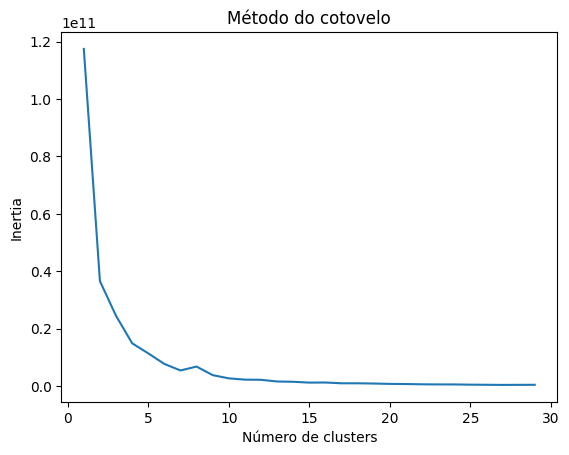

In [35]:
inertia=[]
for i in range(1,30):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(duas_dimensoes)
    inertia.append(kmeans.inertia_)

plt.plot(list(range(1,30)), inertia)
plt.title("Método do cotovelo")
plt.xlabel("Número de clusters")
plt.ylabel("Inertia")

Utilizando K=10 e comparando o agrupamento realizado pelo KMeans com os dados rotulados do dataset original

Colunas escolhidas pelo PCA (nomes): [['gdpp' 'income']
 ['income' 'gdpp']]


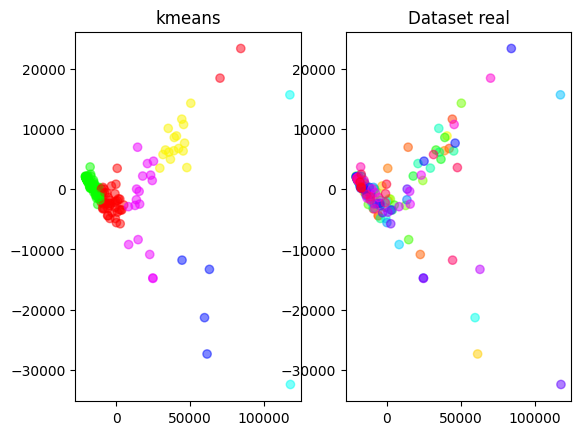

In [94]:
kmeans = KMeans(n_clusters=7, n_init='auto')
kmeans.fit(duas_dimensoes)
solucao = kmeans.predict(duas_dimensoes)

plt.subplot(1,2,1)
plt.scatter(duas_dimensoes[:,0], duas_dimensoes[:,1], c=solucao, alpha=0.5, cmap='hsv')
plt.title("kmeans")

plt.subplot(1,2,2)
plt.scatter(duas_dimensoes[:,0], duas_dimensoes[:,1], c=saida_num, alpha=0.5, cmap='hsv')
plt.title("Dataset real")

duas_dimensoes = pca.fit_transform(entrada)
colunas_escolhidas = np.argsort(np.abs(pca.components_), axis=1)[:, -2:]
colunas_escolhidas_nomes = np.array(entrada.columns)[colunas_escolhidas]
print("Colunas escolhidas pelo PCA (nomes):", colunas_escolhidas_nomes)

A partir desse gráfico e dos dados das colunas escolhidas pelo CPA é possível analisar a classificação dos países. Assim, primeiramente o K-Means encontrou 7 clusters diferentes nos dados, de forma que cada cor representa um cluster. Além disso, o eixo x representa o gdpp, enquanto o eixo y representa a income.

Dessa forma, é possível visualizar como os clusters são formados principalmente pela a renda (income) e pelo o PIB per capita (gdpp), de forma que sua estrutura está ligada ao desenvolvimento econômico do país. O PIB per capita, sendo resultado do PIB dividido pelos habitantes do país, é um forte indicador do padrão econômico do país. Países com PIB per capita maior costumam ter um padrão de vida mais elevado, enquanto no contrário geralmente se observa uma menor industrialização e acesso à educação. Esse é o caso que se observa no cluster verde, vermelho e rosa, que estao todos muito próximos do 0. Já a renda de um país corresponde à soma de todos os rendimentos gerados por meio da produção de bens e serviços num dado período de tempo. Assim, observa-se que os países no cluster azul escuro  tem um PIB per capita médio entre os clusters analisados, porém um rendimento negativo - ou seja, ele está em déficit. É o oposto dos que estão nos clusters amarelo e rosa escuro - que possuem PIB per capita médio para alto e renda também alta. Por último, o cluster na cor aqua tem um PIB per capita alto, porém uma renda alternando entre os extremos - muito alta ou negativa, indicando países de PIB per capita parecidos mas rendas opostas.